# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15665499181                   -0.60    6.1    299ms
  2   -11.16021721604       -2.45       -1.30    1.0    146ms
  3   -11.16039843955       -3.74       -2.34    2.1    174ms
  4   -11.16041655636       -4.74       -3.22    2.1    198ms
  5   -11.16041703430       -6.32       -3.37    2.3    194ms
  6   -11.16041704547       -7.95       -3.52    1.0    122ms
  7   -11.16041704827       -8.55       -3.72    1.0    125ms
  8   -11.16041705031       -8.69       -4.13    1.3    132ms
  9   -11.16041705112       -9.09       -4.51    1.0    126ms
 10   -11.16041705137       -9.60       -4.94    1.3    138ms
 11   -11.16041705143      -10.18       -5.35    1.7    151ms
 12   -11.16041705145      -10.81       -6.01    2.0    185ms


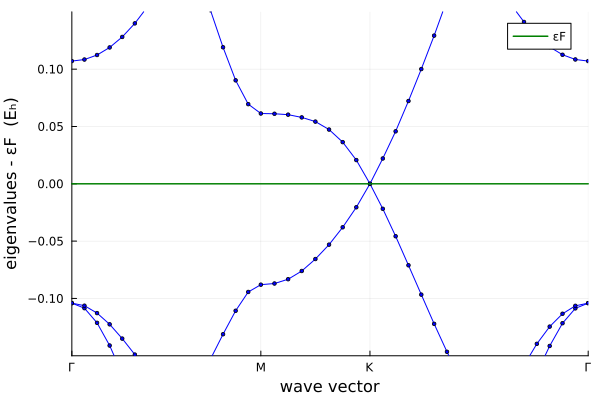

In [1]:
using DFTK
using Unitful
using UnitfulAtomic
using LinearAlgebra
using Plots

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C; psp=load_psp("hgh/pbe/c-q4"))
atoms = [C, C]

# Run SCF
model = model_PBE(lattice, atoms, positions; temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
kpath = irrfbz_path(model; dim=2, space_group_number=13)  # graphene space group number
bands = compute_bands(scfres, kpath; kline_density=20)
plot_bandstructure(bands)